### Marking Rubric (which may award partial credit) 

- [0.1 points]: All relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] are reported within the notebook
- [0.2 points]: Evaluation of correctness and clarity in written communication for Question "3"
- [0.2 points]: Evaluation of correctness and clarity in written communication for Question "4"
- [0.3 points]: Evaluation of submitted work and conclusions for Question "9"
- [0.2 points]: Evaluation of written communication of the "big picture" differences and correct evidence assessement for Question "11"

Link: https://chatgpt.com/share/672d71c1-7980-800e-8363-b6d5998f2ed2


### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create *python* code explicitly demonstrating your explanation using *numpy* and *scipy.stats* <br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Your answer can be quite concise and will likely just address the "mathematical" and "statistical" aspects of the process of a **Simple Linear Model** specification, perhaps giving an intuitive interpretation summary of the result as a whole_
>   
> - _Your code could be based on values for `n`, `x`, `beta0`, `beta1`, and `sigma`; and, then create the `errors` and `y`_
> 
> - _The predictors $x_i$ can be fixed arbitrarily to start the process (perhaps sampled using `stats.uniform`), and they are conceptually different from the creation of **error** (or **noise**) terms $\epsilon_i$ which are sampled from a **normal distribution** (with some aribtrarily *a priori* chosen **standard deviation** `scale` parameter $\sigma$) which are then combined with $x_i$ through the **Simple Linear Model** equation (based on aribtrarily *a priori* chosen **slope** and **intercept coefficients**) to produce the $y_i$ outcomes_
> 
> - _It should be fairly easy to visualize the "a + bx" line defined by the **Simple Linear Model** equation, and some **simulated** data points around the line in a `plotly` figure using the help of a ChatBot_
> 
> _If you use a ChatBot (as expected for this problem), **don't forget to ask for summaries of your ChatBot session(s) and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatGPT)**_
>
> 
> _**Question Scope Warning:** *Be careful when using a ChatBot to help you with creating an example dataset and coding up a visualization though, because it might suggest creating (and visualizing) a fitted model for to your data (rather than the theoretical model); but, this is not what this question is asking you to demonstrate*. This question is not asking about how to produce a fitted **Simple Linear Regression** model or explain how model **slope** and **intercept coefficients** are calculated (e.g., using "ordinary least squares" or analytical equations to estimate the **coefficients**  for an observed dataset)_
> ```python
> # There are two distinct ways to use `plotly` here
>
> import plotly.express as px
> px.scatter(df, x='x',  y='y', color='Data', 
>            trendline='ols', title='y vs. x')
>        
> import plotly.graph_objects as go
> fig = go.Figure()
> fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Data'))
> 
> # The latter is preferable since `trendline='ols'` in the former 
> # creates a fitted model for the data and adds it to the figure
> ```
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>


A theoretical simple linear regression model attempts to explain the relationship between two variables X and Y. In the equasion for a simple linear regression model (Y=β0+β1X+ϵ), it is essentially saying that there is a relationship between the Y and X, where with each change in Y, there is a change in X.

- X is the predictor, or the independent variable.
- Y is the outcome, or the dependent variable. 
- β0 is the value we get when X is equal to 0 (when there is no change)
- β1 is the slope, that will depend on each increase in X.
- ϵ is the error variable, which helps account for the possible random variation in Y that can't be explained by X. 

In simple linear regression, it’s generally assumed that 𝜖 is normally distributed with a mean of 0 and a constant variance 𝜎^2.

The reason why they combine to form a sample from the normal distribution is due to the error variable being normally distributed, and the fact that Y is the sum of a linear function (X) and the error.

NameError: name 'fig' is not defined

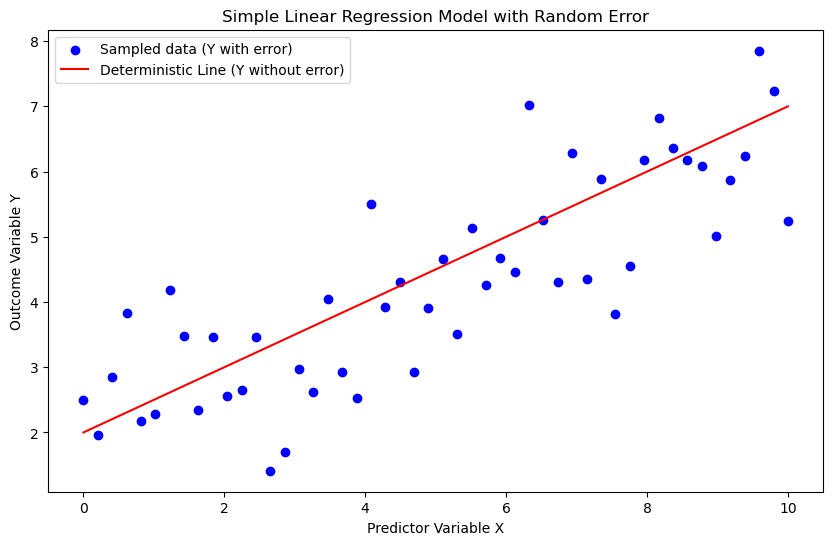

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters of the regression model
beta_0 = 2.0   # Intercept
beta_1 = 0.5   # Slope
sigma = 1.0    # Standard deviation of the error term

# Generate sample data for the predictor variable X
np.random.seed(42)
X = np.linspace(0, 10, 50)  # 50 evenly spaced values between 0 and 10

# Calculate the expected outcome (deterministic part)
Y_deterministic = beta_0 + beta_1 * X

# Generate random errors from a normal distribution
errors = norm.rvs(loc=0, scale=sigma, size=len(X))

# Calculate the actual outcome variable Y as per the model
Y = Y_deterministic + errors

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label="Sampled data (Y with error)")
plt.plot(X, Y_deterministic, color='red', label="Deterministic Line (Y without error)")
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.title("Simple Linear Regression Model with Random Error")
plt.legend()
fig.show(renderer="png")

### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> - _Combine the **simulated** `x` and `y` into a `pandas` data frame object named `df` with the column names "x" and "y"_
> 
> - _Replace the inline question comments below with their answers (working with a ChatBot if needed)_
>
> ```python
> import statsmodels.formula.api as smf  # what is this library for?
> import plotly.express as px  # this is a ploting library
>
> # what are the following two steps doing?
> model_data_specification = smf.ols("y~x", data=df) 
> fitted_model = model_data_specification.fit() 
>
> # what do each of the following provide?
> fitted_model.summary()  # simple explanation? 
> fitted_model.summary().tables[1]  # simple explanation?
> fitted_model.params  # simple explanation?
> fitted_model.params.values  # simple explanation?
> fitted_model.rsquared  # simple explanation?
>
> # what two things does this add onto the figure?
> df['Data'] = 'Data' # hack to add data to legend 
> fig = px.scatter(df, x='x',  y='y', color='Data', 
>                  trendline='ols', title='y vs. x')
>
> # This is essentially what above `trendline='ols'` does
> fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
>                 line=dict(color='blue'), name="trendline='ols'")
> 
> fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
> ```
>
> _The plotting here uses the `plotly.express` form `fig.add_scatter(x=x, y=y)` rather than the `plotly.graph_objects` form `fig.add_trace(go.Scatter(x=x, y=y))`. The difference between these two was noted in the "Further Guidance" comments in the previous question; but, the preference for the former in this case is because `px` allows us to access `trendline='ols'` through `px.scatter(df, x='x',  y='y', trendline='ols')`_

</details>

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     98.58
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           3.20e-13
Time:                        02:05:48   Log-Likelihood:                -66.142
No. Observations:                  50   AIC:                             136.3
Df Residuals:                      48   BIC:                             140.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0644      0.258      7.991      0.0

NameError: name 'fig' is not defined

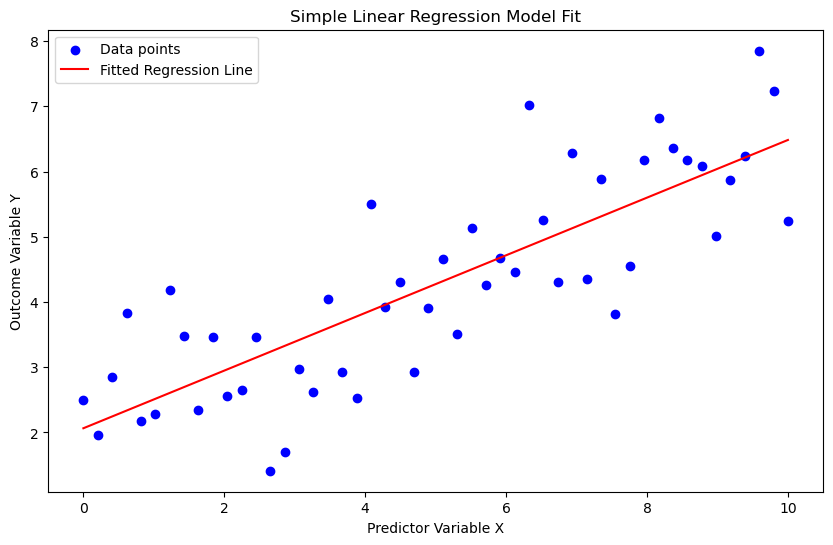

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Set random seed for reproducibility
np.random.seed(42)

# Parameters of the regression model
beta_0 = 2.0   # Intercept
beta_1 = 0.5   # Slope
sigma = 1.0    # Standard deviation of the error term

# Generate predictor data X
X = np.linspace(0, 10, 50)

# Calculate the deterministic part of Y
Y_deterministic = beta_0 + beta_1 * X

# Generate random errors
errors = np.random.normal(loc=0, scale=sigma, size=len(X))

# Calculate outcome Y
Y = Y_deterministic + errors

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Print the model summary
print(model.summary())

# Visualize the fitted model
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Data points')
plt.plot(data['X'], model.predict(data), color='red', label='Fitted Regression Line')
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.title("Simple Linear Regression Model Fit")
plt.legend()
fig.show(renderer="png")

### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _This question is effectively asking you to explain what the combined code you produced for Questions 1 and 2 is trying to demonstrate overall. If you're working with a ChatBot (as expected), giving these two sets of code as context, and asking what the purpose of comparing these lines could be would be a way to get some help in formulating your answer_
> 
> _The graphical visualization aspect of this question could be accomplished by appending the following code to the code provided in Question 2._
> 
> ```python
> # what does this add onto the figure in constrast to `trendline='ols'`?
> x_range = np.array([df['x'].min(), df['x'].max()])
> # beta0 and beta1 are assumed to be defined
> y_line = beta0 + beta1 * x_range
> fig.add_scatter(x=x_range, y=y_line, mode='lines',
>                 name=str(beta0)+' + '+str(beta1)+' * x', 
>                 line=dict(dash='dot', color='orange'))
>
> fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
> ```
> 
> _The right way to interactively "see" the answer to this question is to repeatedly create different dataset **simulations** using your theoretical model and the corresponding fitted models, and repeatedly visualize the data and the two lines over and over... this would be as easy as rerunning a single cell containing your simulation and visualization code..._
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

NameError: name 'fig' is not defined

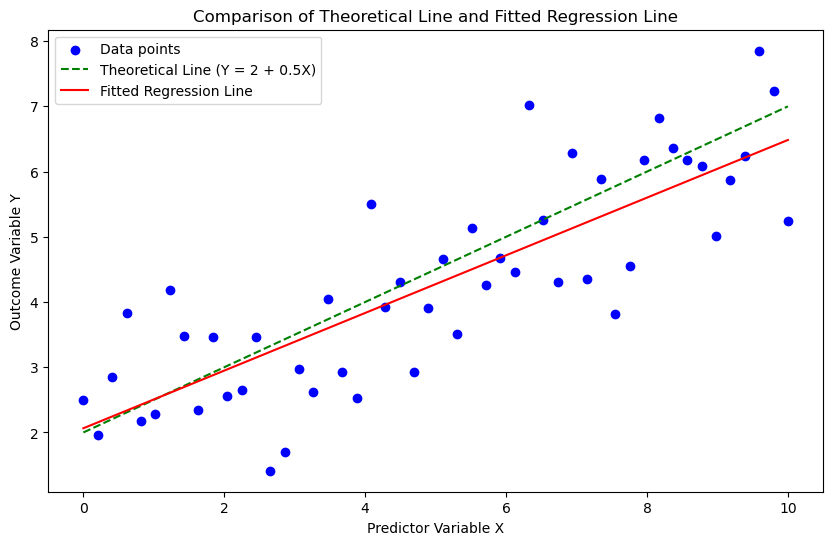

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Set random seed for reproducibility
np.random.seed(42)

# Parameters of the regression model
beta_0 = 2.0   # Theoretical Intercept
beta_1 = 0.5   # Theoretical Slope
sigma = 1.0    # Standard deviation of the error term

# Generate predictor data X
X = np.linspace(0, 10, 50)

# Calculate the deterministic part of Y (Theoretical Line)
Y_theoretical = beta_0 + beta_1 * X

# Generate random errors
errors = np.random.normal(loc=0, scale=sigma, size=len(X))

# Calculate outcome Y
Y = Y_theoretical + errors

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Visualize the theoretical line and fitted model
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='blue', label='Data points')
plt.plot(data['X'], Y_theoretical, color='green', linestyle='--', label='Theoretical Line (Y = 2 + 0.5X)')
plt.plot(data['X'], model.predict(data), color='red', label='Fitted Regression Line')
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.title("Comparison of Theoretical Line and Fitted Regression Line")
plt.legend()
fig.show(renderer="png")

The difference between the two for this graph is the that the green dotted line, the theoretical line, is the exact relationship we defined in the model and does not include the error term, whereas the fitted regression line is estimated based off of the theoretical line but also includes the error variable in it.

### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*)<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _The previous questions used code to explore the distinction between theoretical (true) $Y_i = \beta_0 + \beta_1 x_i + \epsilon_i [\text{where } \epsilon_i \sim \mathcal{N}(0, \sigma)]$ and fitted (estimated) $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ **Simple Linear Regression** models_
>
> _This question asks you to explicitly illustrate what the latter fitted **Simple Linear Regression** model $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ is (in contrast to the linear equation of the theoretical model)_
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

fitted_model.fittedvalues are the predicted values of 𝑌 calculated by plugging the observed values of 𝑋 into the estimated regression equation, so in other words, fitted_model.fittedvalues are derived directly using the parameter estimates fitted_model.params. This equation is derived from the coefficients estimated by the model, which can be accessed via fitted_model.params or fitted_model.summary().tables[1]. 

### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by *trendline='ols'* and *smf.ols(...).fit()*) and why it requires "squares"<br>
    
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _This question addresses the use of **residuals** $\text{e}_i = \hat \epsilon_i = y_i - \hat y_i$ (in contrast to the **error** terms $\epsilon_i$ of the theoretical model), and particularly, asks for an explanation based on the following visualization_
>
> ```python 
> import scipy.stats as stats
> import pandas as pd
> import statsmodels.formula.api as smf
> import plotly.express as px
> 
> n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
> x = stats.uniform(x_min, x_range).rvs(size=n)
> errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
> y = beta0 + beta1 * x + errors
> 
> df = pd.DataFrame({'x': x, 'y': y})
> model_data_specification = smf.ols("y~x", data=df) 
> fitted_model = model_data_specification.fit() 
> 
> df['Data'] = 'Data' # hack to add data to legend 
> fig = px.scatter(df, x='x',  y='y', color='Data', 
>                  trendline='ols', title='y vs. x')
> 
> # This is what `trendline='ols'` is
> fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
>                 line=dict(color='blue'), name="trendline='ols'")
> 
> x_range = np.array([df['x'].min(), df['x'].max()])
> y_line = beta0 + beta1 * x_range
> fig.add_scatter(x=x_range, y=y_line, mode='lines',
>                 name=str(beta0)+' + '+str(beta1)+' * x', 
>                 line=dict(dash='dot', color='orange'))
> 
> # Add vertical lines for residuals
> for i in range(len(df)):
>     fig.add_scatter(x=[df['x'][i], df['x'][i]],
>                     y=[fitted_model.fittedvalues[i], df['y'][i]],
>                     mode='lines',
>                     line=dict(color='red', dash='dash'),
>                     showlegend=False)
>     
> # Add horizontal line at y-bar
> fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
>                 line=dict(color='black', dash='dot'), name='y-bar')
> 
> fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
> ```
>
> _**Question Scope Warning**: we are not looking for any explanation realted to the mathematical equations for the line chosen for the **Simple Linear Regression** model by the "ordinary least squares" method, which happen to be_
> 
> _$$\hat \beta_1 = r_{xy}\frac{s_y}{s_x} \quad \text{ and } \quad  \hat\beta_0 = \bar {y}-\hat \beta_1\bar {x}$$_
>
> _where $r_{xy}$ is the **correlation** between $x$ and $y$ and $s_y$ and $s_x$ are their **sample standard deviations**_
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

Ordinary least squares (OLS) is a linear regression technique that helps find the line of best fit within a set of observed data points. The line of best fit is defined as the line that minimizes the sum of the squared residuals (the differences between the observed values and the values predicted by the line). The usage of squares is required for a few main reasons:
1. Getting rid of negative residuals
2. Showing larger errors more clearly 

### 6. Confirm that the following explain what the two *np.corrcoef...* expressions capture, why the final expression can be interpreted as "the proportion of variation in (outcome) y explained by the model (fitted_model.fittedvalues)", and therefore why *fitted_model.rsquared* can be interpreted as a measure of the accuracy of the model<br>

1. `fitted_model.rsquared`
2. `np.corrcoef(y,x)[0,1]**2`
3. `np.corrcoef(y,fitted_model.fittedvalues)[0,1]**2`
4. `1-((y-fitted_model.fittedvalues)**2).sum()/((y-y.mean())**2).sum()`

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _**R-squared** is the "the proportion of variation in (outcome) $y$ explained by the model ($\hat y_i$)" and is defined as_
>
> _$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat y)^2}{\sum_{i=1}^n(y_i-\bar y)^2}$_
>
> _The visuzation provided in the previous problem can be used to consider $(y_i-\bar y)^2$ as the squared distance of the $y_i$ to their sample average $\bar y$ as opposed to the squared **residuals** $(y_i-\hat y)^2$ which is the squared distance of the $y_i$ to their fitted (predicted) values $y_i$._
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

1. fitted_model.rsquared: This is the R-squared value, also known as the coefficient of determination. It quantifies the proportion of the total variation in the outcome variable y that is explained by the linear regression model. This value ranges from 0 to 1, with higher values indicating that a greater proportion of y's variation is captured by the model, suggesting a better fit.
2. np.corrcoef(y, x)[0,1]**2: This calculates the square of the correlation coefficient between y and 𝑥. In a simple linear regression (with one predictor), this value is equal to the R-squared value. This is because, in simplelinear regression, R-squared is essentially the square of the Pearson correlation between 𝑦 and 𝑥. It indicates theproportion of the variance in 𝑦 that can be linearly explained by 𝑥 alone.
3. np.corrcoef(y, fitted_model.fittedvalues)[0,1]**2: This calculates the square of the correlation coefficient between the observed values 𝑦 and the model’s predicted (fitted) values, fitted_model.fittedvalues. Squaring this correlation coefficient similarly represents the proportion of variation in y that is explained by the fitted model.
4. 1 - ((y - fitted_model.fittedvalues)**2).sum() / ((y - y.mean())**2).sum(): This expression is another way of calculating R-squared. The numerator, ((y - fitted_model.fittedvalues)**2).sum(), represents the sum of squared residuals (i.e., the unexplained variation in 𝑦 by the model). The denominator, ((y - y.mean())**2).sum(), represents the total variation in 𝑦 (known as the total sum of squares).Taking 1− this fraction gives the proportion of 𝑦's total variation explained by the model.

The R-squared value captures the proportion of variation in the outcome 𝑦 that the model explains. Higher R-squared values indicate that the model's predictions align more closely with the observed values, thus explaining a larger portion of the variability in 𝑦. Therefore, fitted_model.rsquared can be interpreted as a measure of the model's accuracy, as it tells us how well the model captures the underlying pattern in the data. In simple linear regression, all four expressions above yield the same R-squared value, reinforcing the idea that they each measure the model’s explanatory power for 𝑦 through different approaches.

### 7. Indicate a couple of the assumptions of the **Simple Linear Regression** model specification do not seem compatible with the example data below

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

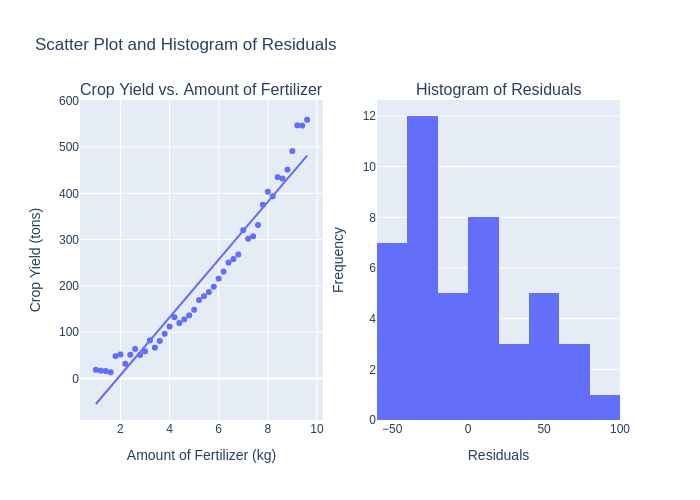

In [5]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png")

1. Linearity
2. Homoscedasticity 

## "Week of Nov04" HW [due prior to the Nov08 TUT]

### In place of the "Project" format we introduced for the previous weeks HW, the remaining questions will be a collection of exercises based around the following data

> The details of the LOWESS Trendline shown below are not a part of the intended scope of the activities here, but it is included since it is suggestive of the questions we will consider and address here


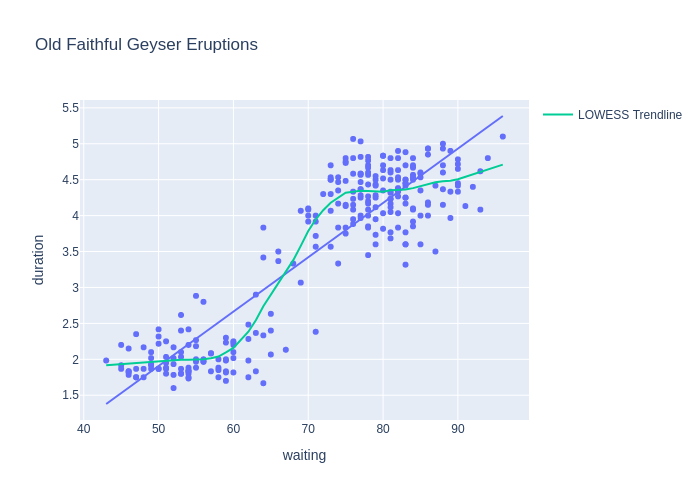

In [6]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

### 8. Specify a **null hypothesis** of "no linear association (on average)" in terms of the relevant **parameter** of the **Simple Linear Regression** model, and use the code below to characterize the evidence in the data relative to the **null hypothesis** and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.<br>

   > ```python
   > import seaborn as sns
   > import statsmodels.formula.api as smf
   >
   > # The "Classic" Old Faithful Geyser dataset
   > old_faithful = sns.load_dataset('geyser')
   > 
   > linear_for_specification = 'duration ~ waiting'
   > model = smf.ols(linear_for_specification, data=old_faithful)
   > fitted_model = model.fit()
   > fitted_model.summary()
   > ```

The null hypothesis H0 = B1 

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the **null hypothesis** in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Remember that **Hypothesis Ttesting** is not a "mathematical proof"_
>
> - _We do not prove $H_0$ false, we instead give evidence against the $H_0$: "We reject the null hypothesis with a p-value of XYZ, meaning we have ABC evidence against the null hypothesis"_
> - _We do not prove $H_0$ is true, we instead do not have evidence to reject $H_0$: "We fail to reject the null hypothesis with a p-value of XYZ"_

|p-value|Evidence|
|-|-|
|$$p > 0.1$$|No evidence against the null hypothesis|
|$$0.1 \ge p > 0.05$$|Weak evidence against the null hypothesis|
|$$0.05 \ge p > 0.01$$|Moderate evidence against the null hypothesis|
|$$0.01 \ge p > 0.001$$|Strong evidence against the null hypothesis|
|$$0.001 \ge p$$|Very strong evidence against the null hypothesis|

</details>    

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


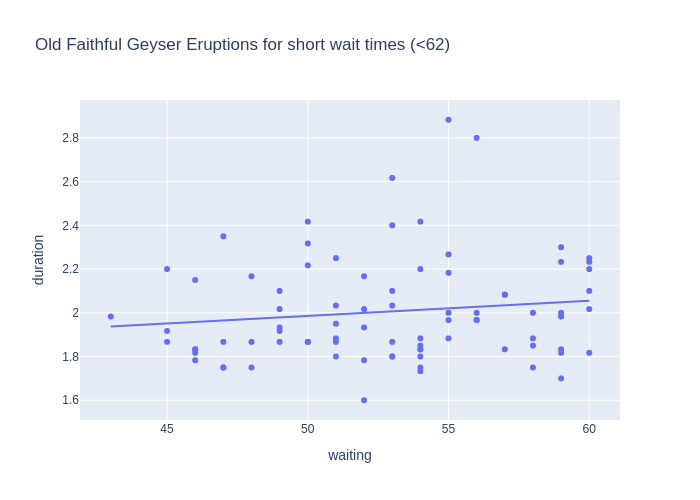

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png")

- By adjusting short_wait_limit, we can observe how the relationship changes with slightly extended ranges of waiting times.
- If the relationship strengthens with increasing short_wait_limit, it suggests that the linear association might only hold when more of the dataset is included.
- Conversely, if the relationship remains insignificant or weak across all short limits, it may imply that the significant linear relationship only becomes clear with longer waiting times.


### 10. Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to<br>

1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models; 
2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficients** under a **null hypothesis** assumption of "no linear association (on average)"; then,
3. report if $0$ contained within a 95\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _You'll need to create `for` loops to repeatedly create fitted **Simple Linear Regression** models using different samples, collecting the **fitted slope coeffient** created in each `for` loop "step" in order to visualize the **simulated sampling distributions**_
> 
> - _A **bootstrapped sample** of the "long wait times" dataset can be created with `old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)`_
>
> - _A **simulated** version of the "long wait times" dataset can be created by first creating `old_faithful_simulation = old_faithful[long_wait].copy()` and then assigning the **simulated** it values with `old_faithful_simulation['duration'] = 1.65 + 0*old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.235).rvs(size=long_wait.sum())`_ 
>
>  _The values $\beta_0 = 1.65$ and $\sigma = 0.37$ are chosen to match what is actually observed in the data, while $\beta_1 = 0$ is chosen to reflect a **null hypothesis** assumption of "no linear assocaition (on average)"; and, make sure that you understand why it is that_
>
>
> - _if `bootstrapped_slope_coefficients` is the `np.array` of your **bootstrapped slope coefficients** then `np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])` is a 95\% **bootstrapped confidence interval**_
> 
> - _if `simulated_slope_coefficients` is the `np.array` of your **fitted slope coefficients** **simulated** under a **null hypothesis** "no linear association (on average)" then `(np.abs(simulated_slope_coefficients) >= smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params[1]).mean()` is the **p-value** for the **simulated** **simulated sampling distribution of the slope coeficients** under a **null hypothesis** "no linear association (on average)"_

</details>


In [9]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title = "Old Faithful Geyser Eruptions for s
                 hort wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png")

SyntaxError: unterminated string literal (detected at line 10) (1057552462.py, line 10)

In [10]:
#Setting wait time limit
short_wait_limit = 62 # Options: 64, 66
short_wait = old_faithful.waiting < short_wait_limit

In [11]:
#Fitting model 
print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


In [13]:
#Visualization
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

### 11. Since we've considered wait times of *<64* "short" and wait times of *>71* "long", let's instead just divide the data and insead call wait times of *<68* "short" and otherwise just call them "long". Consider the **Simple Linear Regression** model specification using an **indicator variable** of the wait time length where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset 

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

### and explain the "big picture" differences between this model specification and the previously considered model specifications and report the evidence against a **null hypothesis** of "no difference between groups "on average") for the new **indicator variable** based model

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


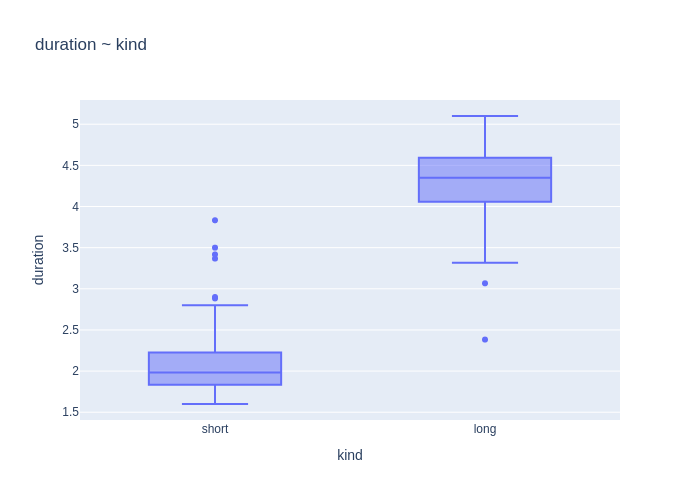

In [15]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

In [16]:
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define short and long waiting time categories based on <68 minutes and >=68 minutes
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'long' if x >= 68 else 'short')

# Fit the linear model with an indicator variable
model = smf.ols('duration ~ C(kind)', data=old_faithful)
fitted_model = model.fit()

# Show the model summary
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        02:08:48   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2979      0.031  

Differences: 

Continuous Model (duration ~ waiting):

- This model assumes a direct, continuous relationship between waiting time and eruption duration, allowing us to measure how each additional minute of waiting time impacts duration.
- It provides a more granular view of how eruption duration changes across the full range of waiting times, but may miss any threshold effects.

Restricted Models for Short and Long Waits (duration ~ waiting, with filters for short or long wait times):

- These models allow us to observe linear relationships within specific ranges (e.g., short or long), helping to identify if the relationship’s strength varies by wait time category.
- However, separate models for short and long groups do not allow for direct comparison of average eruption durations between the two groups within a single model.

Indicator Variable Model (duration ~ C(kind)):

- This model captures average differences between "short" and "long" wait times directly and does not assume a continuous change within each group.
- It helps to answer a simpler question: Do long waits lead to significantly longer eruptions on average?
- It’s suitable if we suspect the relationship between waiting time and duration may not be linear or continuous and could instead be driven by categories (short vs. long waits).

### 12. As discussed in question 2 of the **Communication Activity #2** of the Oct25 TUT (addressing an **omitted** section of the TUT), the assumption in **Simple Linear Regression** that the **error** terms $\epsilon_i \sim \mathcal N\left(0, \sigma\right)$ is diagnostically assessed by evaluating distributional shape of the **residuals** $\text{e}_i = \hat \epsilon_i = y_i - \hat y_i$
### Identify which of the histograms suggests the plausibility of the assumption that the distribution of **error** terms is normal for each of the models, and explain why the other three do not support this assumption.<br>

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 13. Since the "short" and "long" wait times are not "before and after" measurements there are not natural pairs on which to base differences; so, we can't do a "one sample" (paired differences) **hypothesis test**; but, we can do a proper "two sample" hypothesis testing using a **permuation test**; and, we could create a 95% **bootstrap confidence interval** for the difference in means of the two populations; namely, 

1. test $H_0: \mu_{\text{short}}=\mu_{\text{long}} \quad \text{no difference in duration between short and long groups}$ by "shuffling" the labels<br><br>

2. provide `np.quantile(bootstrapped_mean_differences, [0.025, 0.975])` by repeatedly bootstrapping each each group and collecting the difference between the sample means
    
### and once you've finished (a) explain how the sampling approaches work for the two simulations, then (b) compare and contrast these two methods with the **indicator variable** based model approach used in Question 10, explaining how they're similar and different<br>
    
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _You'll need to create `for` loops for repeated (shuffling simulation) **permutation** and (subgroup) **bootstrapping**, where_
>
> - _"shuffling" for **permutation testing** is done like this `old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)#.groupby('kind').size()`; then, the **mean difference statistic** is then calculated using `.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]` (so the **observed statistic** is `old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]`_
> 
> - _"two sample" **bootstrapping** is done like this `old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)#.groupby('kind').size()`; then, the **bootstrapped mean difference statistic** is then calculated using `.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]` (like the **observed statistic** except this is applied to the **bootstrapped** resampling of `old_faithful`)_
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_
</details>

### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

>  _Here is the link of [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) in case it gets lost among all the information you need to keep track of_  : )
>
> _Just answering "Yes" or "No" or "Somewhat" or "Mostly" or whatever here is fine as this question isn't a part of the rubric; but, the midterm and final exams may ask questions that are based on the tutorial and lecture materials; and, your own skills will be limited by your familiarity with these materials (which will determine your ability to actually do actual things effectively with these skills... like the course project...)_
</details>    

Wiki textbook with chatbot yeah not really office hours though.

# Recommended Additional Useful Activities [Optional]

The "Ethical Profesionalism Considerations" and "Current Course Project Capability Level" sections below **are not a part of the required homework assignment**; rather, they are regular weekly guides covering (a) relevant considerations regarding professional and ethical conduct, and (b) the analysis steps for the STA130 course project that are feasible at the current stage of the course 

<br>
<details class="details-example"><summary style="color:blue"><u>Ethical Professionalism Considerations</u></summary>

### Ethical Professionalism Considerations
    
The TUT and HW both addressed some of the assumptions used in **Simple Linear Regression**. The **p-values** provided by `statsmodels` via `smf.ols(...).fit()` depend on these assumptions, so if they are not (at least approximately) correct, the **p-values** (and any subsequent claims regarding the "evidience against" the **null hypothesis**) are not reliable. In light of this consideration, describe how you could diagnostically check the first three assumptions (given below) when using analyses based on **Simple Linear regression** model. From an Ethical and Professional perspective, do you think doing diagnostic checks on the assumptions of a **Simple Linear regression** model is something you can and should do whenever you're doing this kind of analysis? 
            
> The first three assumptions associated with the **Simple Linear regression** model are that
> 
> - the $\epsilon_i$ **errors** (sometimes referred to as the **noise**) are **normally distributed**
> - the $\epsilon_i$ **errors** are **homoscedastic** (so their distributional variance $\sigma^2$ does not change as a function of $x_i$)
> - the linear form is [at least reasonably approximately] "true" (in the sense that the above two remain [at least reasonably approximately] "true") so that then behavior of the $Y_i$ **outcomes** are represented/determined on average by the **linear equation**)<br>
> 
>    and there are additional assumptions; but, a deeper reflection on these is "beyond the scope" of STA130; nonetheless, they are that<br><br>
> - the $x_i$ **predictor variable** is **measured without error**
> - and the $\epsilon_i$ **errors** are **statistically independent** (so their values do not depend on each other)
> - and the $\epsilon_i$ **errors** are **unbiased** relative to the **expected value** of **outcome** $E[Y_i|x_i]=\beta_0 + \beta_1x_i$ (which is equivalently stated by saying that the mean of the **error distribution** is $0$, or again equivalently, that the **expected value** of the **errors** $E[\epsilon_i] = 0$)
    
</details>

<details class="details-example"><summary style="color:blue"><u>Current Course Project Capability Level</u></summary>
    
### Current Course Project Capability Level

**Remember to abide by the [data use agreement](https://static1.squarespace.com/static/60283c2e174c122f8ebe0f39/t/6239c284d610f76fed5a2e69/1647952517436/Data+Use+Agreement+for+the+Canadian+Social+Connection+Survey.pdf) at all times.**

At this point in the course you should be able to do a **Simple Linear Regression** analysis for data from the Canadian Social Connection Survey data
    
1. Create and test a **null hypothesis** of no linear association "on average" for a couple of columns of interest in the Canadian Social Connection Survey data using **Simple Linear Regression**

2. Use the **residuals** of a fitted **Simple Linear Regression** model to diagnostically assess some of the assumptions of the analysis

3. Use an **indicator variable** based **Simple Linear Regression** model to compare two groups from the Canadian Social Connection Survey data

4. Compare and contrast the results of an **indicator variable** based **Simple Linear Regression** model to analyses based on a **permutation test** and a **bootstrapped confidence interval**   
    
</details>    